In [2]:
import pandas as pd
import os
import re

# Paso 1: Importar pandas

# Paso 2: Especificar los paths de los archivos CSV
directory = '/workspaces/EDA_1/used_cars_dataset/cars.csv'

# Obtener la lista de archivos en el directorio
files = [f for f in os.listdir(directory)]

# Paso 3: Concatenar los archivos en un DataFrame
dfs = []

for file in files:
    # Crear el path completo del archivo
    file_path = os.path.join(directory, file)
    
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv(file_path)
    
    # Agregar el DataFrame a la lista
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mostrar el DataFrame resultante
print(df)


                 model    year  price transmission mileage fuelType    tax  \
0                T-Roc  2019.0  25000    Automatic   13904   Diesel  145.0   
1                T-Roc  2019.0  26883    Automatic    4562   Diesel  145.0   
2                T-Roc  2019.0  20000       Manual    7414   Diesel  145.0   
3                T-Roc  2019.0  33492    Automatic    4825   Petrol  145.0   
4                T-Roc  2019.0  22900    Semi-Auto    6500   Petrol  150.0   
...                ...     ...    ...          ...     ...      ...    ...   
118145              IQ  2011.0   5500    Automatic   30000   Petrol   20.0   
118146   Urban Cruiser  2011.0   4985       Manual   36154   Petrol  125.0   
118147   Urban Cruiser  2012.0   4995       Manual   46000   Diesel  125.0   
118148   Urban Cruiser  2011.0   3995       Manual   60700   Petrol  125.0   
118149   Urban Cruiser  2011.0   4495       Manual   45128   Petrol  125.0   

         mpg  engineSize fuel type engine size mileage2 fuel ty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118150 entries, 0 to 118149
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  object 
 3   transmission  117995 non-null  object 
 4   mileage       117077 non-null  object 
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   fuel type     3517 non-null    object 
 10  engine size   9345 non-null    object 
 11  mileage2      9399 non-null    object 
 12  fuel type2    8537 non-null    object 
 13  engine size2  8537 non-null    object 
 14  reference     9455 non-null    object 
 15  tax(£)        4860 non-null    float64
dtypes: float64(5), object(11)
memory usage: 14.4+ MB


En este punto observamos que hay diferentes columnas con la misma información pero escritas de diferente forma. Nuestro trabajo se enfoca ahora en compilarlas en columnas únicas.

In [4]:
df['fuel type'] = df['fuel type'].apply(lambda x: re.sub(r'\d+', 'n/a', str(x)))
df['fuelType'].fillna('', inplace=True)
df['fuel type'].fillna('', inplace=True)
df['fuel type2'].fillna('', inplace=True)
df['fuel'] = df['fuelType'] + df['fuel type'] + df['fuel type2']
df['fuel'] = df['fuel'].replace(to_replace='.*Diesel.*', value='Diesel', regex=True)
df['fuel'] = df['fuel'].replace(to_replace='.*Petrol.*', value='Petrol', regex=True)
df['fuel'] = df['fuel'].replace(to_replace='.*Hybrid.*', value='Hybrid', regex=True)
df['fuel'] = df['fuel'].replace(to_replace='.*Other.*', value='Other', regex=True)
df.drop(['fuel type','fuelType','fuel type2'], axis = 1, inplace = True)

In [5]:
df['engine size'] = df['engine size'].replace(to_replace=r'^\£\d+(\.\d+)?$', value='n/a', regex=True)
df['engineSize'] = df['engineSize'].astype(str)
df['engineSize'].fillna('', inplace=True)
df['engine size'].fillna('', inplace=True)
df['engine size2'].fillna('', inplace=True)
df['engine'] = df['engineSize'] + df['engine size'] + df['engine size2']
df.drop(['engineSize','engine size','engine size2'], axis = 1, inplace = True)

In [6]:
# Replace values with 0 if '.' in them
df['mileage2'] = df['mileage2'].replace(r'\.\d+', 0, regex=True)

df['mileage2'].fillna('0', inplace=True)
df['mileage'].fillna('0', inplace=True)

df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['mileage2'] = pd.to_numeric(df['mileage2'], errors='coerce')


df['mileage'] = df['mileage'].astype(float)
df['mileage2'] = df['mileage2'].astype(float)
df['mile age'] = df['mileage'] + df['mileage2']
df['mile age'] = df['mile age'].astype(float)
df.drop(['mileage', 'mileage2'], axis = 1, inplace = True)


# print(df['mileage2'].isna().sum())
# print(df['mileage'].isna().sum())
# print(len(df['mileage2']))
# print(len(df['mileage']))
print(len(df['mile age']))


118150


In [7]:
df['tax'].fillna(0, inplace=True)
df['tax(£)'].fillna(0, inplace=True)
df['taxes'] = df['tax'] + df['tax(£)']
df.drop(['tax','tax(£)'], axis = 1, inplace = True)

In [8]:
df.drop('reference', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118150 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  object 
 3   transmission  117995 non-null  object 
 4   mpg           99187 non-null   float64
 5   fuel          118150 non-null  object 
 6   engine        118150 non-null  object 
 7   mile age      108972 non-null  float64
 8   taxes         118150 non-null  float64
dtypes: float64(4), object(5)
memory usage: 8.1+ MB


In [9]:
df['price'] = df['price'].replace('[\£,]', '', regex=True).astype(float)
df['price'] = df['price'].fillna(0)
df = df[df["price"] != 0.0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117995 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  float64
 3   transmission  117995 non-null  object 
 4   mpg           99187 non-null   float64
 5   fuel          117995 non-null  object 
 6   engine        117995 non-null  object 
 7   mile age      108817 non-null  float64
 8   taxes         117995 non-null  float64
dtypes: float64(5), object(4)
memory usage: 9.0+ MB


In [10]:
# Mostrar la cantidad de NaN por columna
nan_por_columna = df.isnull().sum()

# Mostrar el resultado
print(nan_por_columna)

model               0
year               92
price               0
transmission        0
mpg             18808
fuel                0
engine              0
mile age         9178
taxes               0
dtype: int64


In [11]:
df.to_csv('test_cars.csv', index=False)

## Análisis Uni-Variante

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_31977/2783062878.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_31977/2783062878.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,1].set_xticklabels(axis[1,1].get_xticklabels(), rotation=90)


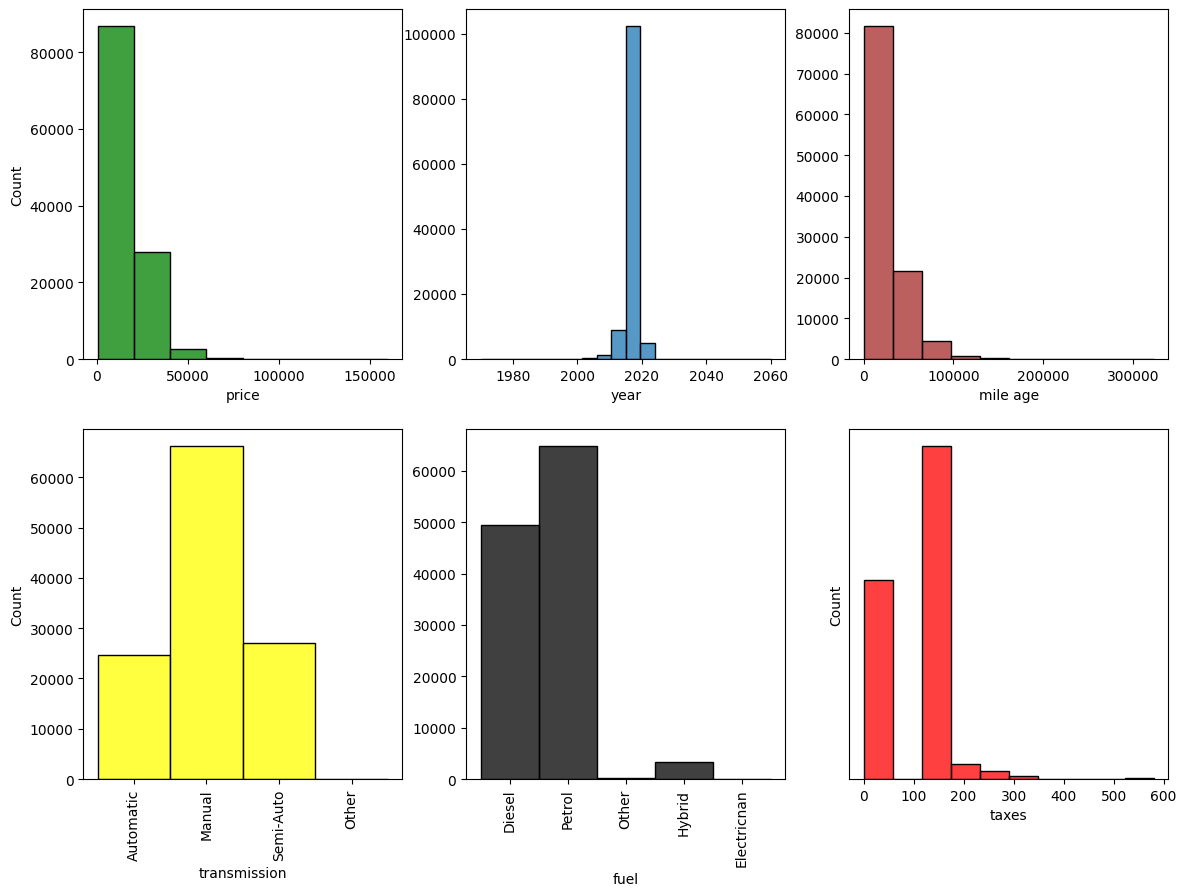

In [15]:
fig, axis = plt.subplots(2,3, figsize = (14,10))
sns.histplot(data = df["price"], bins = 8, ax = axis[0,0], color = 'green')
sns.histplot(data = df["year"], bins = 20, ax = axis[0,1]).set_ylabel('')
sns.histplot(data = df["mile age"], bins = 10, ax = axis[0,2], color = 'brown').set_ylabel('')
sns.histplot(data = df["transmission"], bins = 8, ax = axis[1,0], color = 'yellow')
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)
sns.histplot(data = df["fuel"], bins = 8, ax = axis[1,1], color = 'black').set_ylabel('')
axis[1,1].set_xticklabels(axis[1,1].get_xticklabels(), rotation=90)
sns.histplot(data = df["taxes"], bins = 10, ax = axis[1,2], color = 'red')
axis[1,2].set_yticks([])
plt.show()